# Data

This notebook was created for machine learning research on FeTA2.1 dataset. ["The dataset facilitates the development of novel machine-learning and deep-learning based multi-class segmentation methods for the quantification of brain development on fetal MRI. The ultimate goal is to capture pathological developmental trajectories by the automated quantification of the prenatal development, for which automated approaches free of observer bias are indispensable."](http://neuroimaging.ch/feta) Some brief information about the labels can be found below. For more information, please follow the links in the notes.

| dHCP label | Name | Notes |
| :- | -: | :-: |
| Label 1 | Intracranial space and extra-axial CSF spaces | Cerebrospinal fluid (CSF) is a clear, colorless body fluid found within the tissue that surrounds the brain and spinal cord of all vertebrates.[[1]](https://en.wikipedia.org/wiki/Cerebrospinal_fluid) 
| Label 2 | Gray Matter | Grey matter (or gray matter) is a major component of the central nervous system, consisting of neuronal cell bodies, neuropil (dendrites and unmyelinated axons), glial cells (astrocytes and oligodendrocytes), synapses, and capillaries.[[2]](https://en.wikipedia.org/wiki/Grey_matter) 
| Label 3 | White Matter | White matter refers to areas of the central nervous system (CNS) that are mainly made up of myelinated axons, also called tracts. [[3]](https://en.wikipedia.org/wiki/White_matter)
| Label 4 | Ventricles | The ventricles are structures that produce cerebrospinal fluid, and transport it around the cranial cavity. [[4]](https://teachmeanatomy.info/neuroanatomy/vessels/ventricles/)
| Label 5 | Cerebellum | The cerebellum (which is Latin for “little brain”) is a major structure of the hindbrain that is located near the brainstem. This part of the brain is responsible for coordinating voluntary movements. It is also responsible for a number of functions including motor skills such as balance, coordination, and posture. [[5]](https://www.verywellmind.com/what-is-the-cerebellum-2794964)
| Label 6 | Deep gray matter | Grey matter is classed as either superficial or deep. The superficial grey matter, also called brain cortex, is on the outside of the brain. The deep grey matter is made up of neurons from which originate deep nerve fibres. These neurons tend to form clumps of basal nuclei.[[6]](https://www.msif.org/news/2014/12/16/role-deep-grey-matter-brain-plays-ms/)
| Label 7 | Brainstem and spinal cord| The brainstem (or brain stem) is the posterior stalk-like part of the brain that connects the cerebrum with the spinal cord. [[7]](https://en.wikipedia.org/wiki/Brainstem)

<br><br>

![Structure of the brain](notebook_images/brain2.jpg "Structure of the brain 1.")
<br><p><center>Structure of the brain 1.<a href="https://www.kenhub.com/en/library/learning-strategies/parts-of-the-brain-learn-with-diagrams-and-quizzes">[8]</a></center></p>
<br><br>

![Structure of the brain](notebook_images/brain3.jpg "Structure of the brain 2.")
<br><p><center>Structure of the brain 2.<a href="https://www.researchgate.net/publication/224283818_Patientoriented_simulation_based_on_Monte_Carlo_algorithm_by_using_MRI_data">[9]</a></center></p>
<br><br>

In [150]:
import glob
import json
import os

import cv2
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from ipywidgets import fixed, interactive

In [151]:
def get_subjects(folder):
    subjects = glob.glob(os.path.join(folder, 's*'))
    subjects = [os.path.basename(x) for x in subjects]
    subjects.sort()

    return subjects

In [152]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    return result

In [153]:
def get_nii_paths(subject):
    suffix_image = "_rec-mial_T2w.nii.gz"
    suffix_mask = "_rec-mial_dseg.nii.gz"
    
    path_sub = os.path.join(folder, 
                              subject, 
                              "anat", 
                              subject)
    
    path_image = path_sub+suffix_image
    
    path_mask = path_sub+suffix_mask
    
    return (path_image, path_mask)

In [154]:
def draw_image(index, sub_name, orientation):
    (path_image, path_mask) = get_nii_paths(sub_name)
    
    image = nib.load(path_image).get_fdata()
    mask = nib.load(path_mask).get_fdata()
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 15))
    ax1.set_title('Image')
    ax2.set_title('Mask')

    if orientation == "coronal":
        image = image[:, index, :]
        image = rotate_image(image, 90)
        ax1.imshow(image)
        
        mask = mask[:, index, :]
        mask = rotate_image(mask, 90)
        ax2.imshow(mask)
        ax2.set_xlabel('Labels: ' + str(set.union(*map(set,mask))))
        
    elif orientation == "axial":
        image = image[:, :, index]
        image = rotate_image(image, 90)
        ax1.imshow(image)
        
        mask = mask[:, :, index]
        mask = rotate_image(mask, 90)
        ax2.imshow(mask)
        ax2.set_xlabel('Labels: ' + str(set.union(*map(set,mask))))

    else:
        image = image[index, :, :]
        image = rotate_image(image, 90)
        image = cv2.flip(image, 1)
        ax1.imshow(image)
        
        mask = mask[index, :, :]
        mask = rotate_image(mask, 90)
        mask = cv2.flip(mask, 1)
        ax2.imshow(mask)
        ax2.set_xlabel('Labels: ' + str(set.union(*map(set,mask))))
    

def show_image(subject):
    interactive_plot = interactive(draw_image, index=(0, 255),
                                   sub_name = fixed(subject),
                                   orientation=["axial", "coronal", "sagittal"])
    
    output = interactive_plot.children[-1]
    display(interactive_plot)

In [155]:
folder = 'feta_2.1/'

subjects = get_subjects(folder)

In [156]:
show_image(subjects[0])

interactive(children=(IntSlider(value=127, description='index', max=255), Dropdown(description='orientation', …

In [86]:
from skimage.util import montage

image=nib.load(get_nii_paths(subjects[0])[0]).get_fdata()
image = image[:, :, 87]
image = rotate_image(image, 90)

In [157]:
mask = nib.load(get_nii_paths(subjects[0])[1]).get_fdata()
mask = mask[:, :, 127]
mask = rotate_image(mask, 90)

zeros = np.zeros((256, 256, 2))

In [181]:
mask_rgb = np.stack((zeros[:, :, 0], zeros[:, :, 1], mask), axis=2)

In [182]:
mask_rgb[:, :, 0][mask_rgb[:, :, 2]==1] = 75
mask_rgb[:, :, 1][mask_rgb[:, :, 2]==1] = 75

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


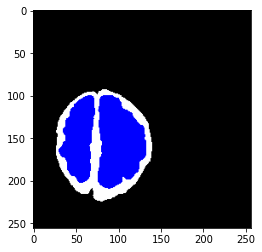

In [183]:
plt.imshow(mask_rgb)